# Data Preprocessing

# 1. Import All Necessary Libraries and Create File Paths

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from osgeo import gdal, gdal_array
import sys
import cv2

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8')

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:wildfire-sumatera-dataset already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:wildfire-sum

# 2. Access The Dataset
The dataset name is **data-total.csv** which contains all the necessary information about dates and location coordinates of a wildfire events in Indonesia.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

wf_data  = pd.read_csv("data-total.csv")
wf_data.columns

# rename columns
wf_data.rename(
    columns={
        'Lat': 'lat', 
        'Long': 'long', 
        'Satellite': 'satellite', 
        'Time_UTC': 'time_utc', 
        'Date': 'date', 
        'Source': 'source', 
        'PROVINSI': 'provinsi',
        'KAB_KOTA': 'kab_kota'
        }, 
    inplace=True,
    )

# adding '-' to date column values
wf_data.date = pd.to_datetime(wf_data.date, format="%Y%m%d")
wf_data.date = wf_data.date.astype('string')

# All provinces in sumatera
sumatera_provinces = [
    'SUMATERA UTARA',
    'JAMBI',
    'RIAU',
    'SUMATERA BARAT',
    'SUMATERA SELATAN',
    'BENGKULU',
    'LAMPUNG',
    'ACEH',
    ]

# create filter so that only events in sumatera will be returned.
sumatera_filter = wf_data['provinsi'].apply(lambda x: x in sumatera_provinces) 
sumatera_only = wf_data.loc[sumatera_filter]

display(sumatera_only.info())
display(sumatera_only.provinsi.unique())
display(sumatera_only.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data-total.csv'

In [ ]:
# sort the data in based on 'date' column in ascending order
sumatera_only = sumatera_only.sort_values(
    by=['date'], 
    ascending=True,
    ignore_index=True,
)

sumatera_only.head()

# 3. Create All Functions for the Project and Constants

In [ ]:
def get_img_as_array(filepath, dictionary):
    """
    :param filepath: location of the satellite bands
    :param dictionary: information about the image bands
    :return: dictionary containing name of the satellite bands as key and array of pixels as value  
    """
    os.chdir(filepath)
    print(filepath)
    band_imgs = {}
    for key, val in dictionary.items():
        # open the .tiff file
        if os.path.exists(filepath):
            tiff_file = gdal.Open(key)
            bands = key.split('_')
            for i, band in enumerate(bands):
                band_imgs[band] = tiff_file.GetRasterBand(i+1).ReadAsArray()
    
    return band_imgs

In [ ]:
def get_class(data):
    """
    :param data: array of values whether mean or median of Delta Normalized Burn Ratio (dNBR)
    :return: an array filled with labels or classes based on their dNBR mean or median.
    """
    burn_severity_class = []
    for value in data:
        if value <= 0.22:
            burn_severity_class.append(0)
        elif value <= 0.4:
            burn_severity_class.append(1)
        elif value > 0.4:
            burn_severity_class.append(2)
        else:
            burn_severity_class.append(-1)
            
    return burn_severity_class

In [ ]:
def get_mean_and_median_dnbr(folder_paths_geotiff, dictionary):
    """
    :param folder_paths_geotiff: an array full of folder paths which contain satellite image in GeoTIFF format
    :param dictionary: a dictionary contain filename of bands as key and the amount of bands inside the GeoTIFF file
    :return: return a tuple of mean of dNBR and median of dNBR
    """
    mean_dnbr_arr=[]
    median_dnbr_arr=[]
    
    for folder in folder_paths_geotiff:
        img_band = get_img_as_array(ROOT+folder, dictionary)

        # find mean of dnbr only value greater than or equal to 0.05
        try:
            temp = img_band['dnbr']
            # Change the data that has no value to zero
            temp = np.where(temp==None, 0, temp)
            temp = np.where(temp>=0.05, temp, np.nan)
        except:
            print(sys.exc_info()[0], "occurred.")
            
        mean_dnbr_arr.append(np.nanmean(temp))
        median_dnbr_arr.append(np.nanmedian(temp))
        
    return (mean_dnbr_arr, median_dnbr_arr)

In [ ]:
LANDSAT_POSTFIRE_DICT = {
    'dnbr_b7': 2,
    'b5_b4': 2,
    'b3_b2': 2
}

SENTINEL_POSTFIRE_DICT = {
    'dnbr_b12': 2,
    'b8_b4': 2,
    'b3_b2': 2
}

# 4. Create Dataframe
## 4.1 Landsat
All columns inside this dataframe are:
1. folder_paths_geotiff = use to store all folder paths for geotiff
2. class_by_mean = use to determine the label of the image based on mean_dnbr
3. class_by_median = use to determine the label of the image on median_dnbr
4. mean_dnbr = stores mean of pixels in delta normalized burned ratio. 
5. median_dnbr = stores median of pixels in delta normalized burned ratio.

In [17]:
# get list of folder paths
landsat_dictionary = {}
landsat_dictionary['folder_paths_geotiff'] = os.listdir(LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH)

# sort using key = int to convert data to int first before sorting
landsat_dictionary['folder_paths_geotiff'].sort(key=int)

# add a folder path of its parent 
landsat_dictionary['folder_paths_geotiff'] = [
    "\\" + "\\".join(LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH.split("\\")[1:]) + "\\" + folder_name 
    for folder_name in landsat_dictionary['folder_paths_geotiff']]

## 4.1.1 Calculate Mean and Median dNBR
Calculate the mean and median of Delta Normalized Burned Ration of each image

In [4]:
landsat_dictionary['mean_dnbr'], landsat_dictionary['median_dnbr'] =  get_mean_and_median_dnbr(
    landsat_dictionary['folder_paths_geotiff'], 
    LANDSAT_POSTFIRE_DICT,
)

## 4.1.2 Save Landsat Dictionary as CSV File

In [21]:
# # convert to pandas DataFrame and export as .csv file
# landsat_df = pd.DataFrame(landsat_dictionary)
# landsat_df.to_csv(METADATA_LANDSAT_8_FILE_PATH, index=False)

## 4.1.3 Open CSV File

In [4]:
landsat_df = pd.read_csv(METADATA_LANDSAT_8_FILE_PATH)
landsat_df.head()

,folder_paths_geotiff,mean_dnbr,median_dnbr,class_by_mean,class_by_median,image_condition,folder_paths_image_mask
0,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118657,0.092437,0,0,1,\wildfire-sumatera-dataset\wildfire-sumatera-i...
1,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118892,0.092641,0,0,1,\wildfire-sumatera-dataset\wildfire-sumatera-i...
2,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124600,0.095925,0,0,1,\wildfire-sumatera-dataset\wildfire-sumatera-i...
3,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.099432,0.074912,0,0,1,\wildfire-sumatera-dataset\wildfire-sumatera-i...
4,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118605,0.092377,0,0,1,\wildfire-sumatera-dataset\wildfire-sumatera-i...


## 4.1.4 Classify Images Using Mean and Median dNBR
<img src="../images/dNBR_classification_and_class_boundaries.jpg" alt="dNBR_classification_and_class_boundaries">

1. Low severity = 0
2. Moderate severity = 1
3. High severity = 2

In [42]:
landsat_df["class_by_mean"] = get_class(landsat_df["mean_dnbr"])
landsat_df["class_by_median"] = get_class(landsat_df["median_dnbr"])

## 4.1.5 Countplot of Landsat-8 Burn Severity Class by Mean dNBR

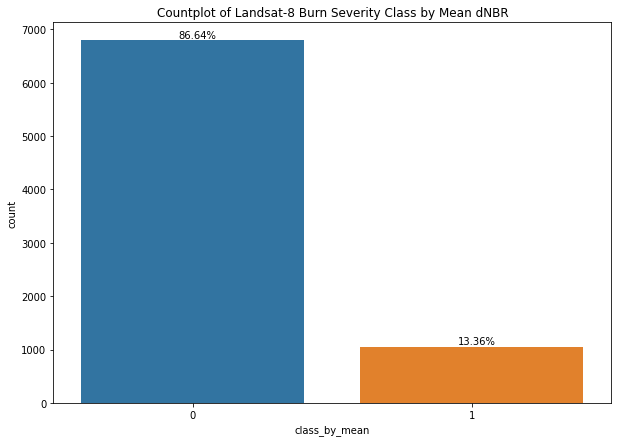

In [5]:
plt.figure(figsize=(10,7))
plt.title("Countplot of Landsat-8 Burn Severity Class by Mean dNBR")
ax = sns.countplot(x='class_by_mean', data=landsat_df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(landsat_df)*100), (p.get_x()+0.35, p.get_height()+50))
plt.show()

## 4.1.6 Countplot of Landsat-8 Burn Severity Class by Median dNBR

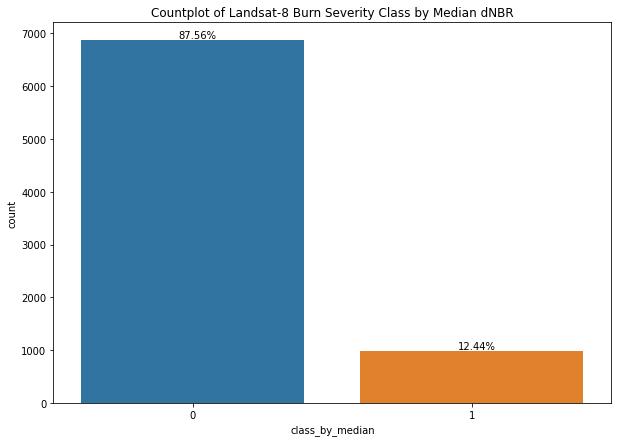

In [6]:
plt.figure(figsize=(10,7))
plt.title("Countplot of Landsat-8 Burn Severity Class by Median dNBR")
ax = sns.countplot(x='class_by_median', data=landsat_df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(landsat_df)*100), (p.get_x()+0.35, p.get_height()+50))
plt.show()

## 4.1.7 Save Landsat Dataframe as CSV

In [47]:
landsat_df.to_csv(METADATA_LANDSAT_8_FILE_PATH , index=False)
landsat_df = pd.read_csv(METADATA_LANDSAT_8_FILE_PATH)
display(landsat_df.head())

,folder_paths_geotiff,mean_dnbr,median_dnbr,class_by_mean,class_by_median
0,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118657,0.092437,0,0
1,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118892,0.092641,0,0
2,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124600,0.095925,0,0
3,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.099432,0.074912,0,0
4,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.118605,0.092377,0,0


## 4.2 Sentinel
All columns inside this dataframe are:

1. folder_paths_geotiff = use to store all folder paths for geotiff
2. class_by_mean = use to determine the label of the image based on mean_dnbr
3. class_by_median = use to determine the label of the image on median_dnbr
4. mean_dnbr = stores mean of pixels in delta normalized burned ratio.
5. median_dnbr = stores median of pixels in delta normalized burned ratio.

In [55]:
# getting list of folder paths
sentinel_dictionary = {}
sentinel_dictionary['folder_paths_geotiff'] = os.listdir(SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH)
# sort using key = int to convert data to int first before sorting
sentinel_dictionary['folder_paths_geotiff'].sort(key=int)

# adding a folder path of its parent 
sentinel_dictionary['folder_paths_geotiff'] = [
    "\\" + "\\".join(SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH.split("\\")[1:]) + "\\" + folder_name 
    for folder_name in sentinel_dictionary['folder_paths_geotiff']] 

## 4.2.1 Calculate Mean and Median dNBR
Calculate the mean and median of Delta Normalized Burned Ration of each image

In [5]:
sentinel_dictionary['mean_dnbr'], sentinel_dictionary['median_dnbr'] =  get_mean_and_median_dnbr(
    sentinel_dictionary['folder_paths_geotiff'], 
    SENTINEL_POSTFIRE_DICT,
)

## 4.2.2 Save Sentinel Dictionary as CSV File

In [19]:
# sentinel_df = pd.DataFrame(sentinel_dictionary)
# sentinel_df.to_csv(METADATA_SENTINEL_2_FILE_PATH , index=False)

## 4.2.3 Open CSV File

In [36]:
sentinel_df = pd.read_csv(METADATA_SENTINEL_2_FILE_PATH)
display(sentinel_df.head())

,folder_paths_geotiff,mean_dnbr,median_dnbr,class_by_mean,class_by_median
0,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124348,0.098779,0,0
1,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124229,0.098487,0,0
2,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.123137,0.096676,0,0
3,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.141992,0.104607,0,0
4,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124485,0.098878,0,0


### 4.2.4 Classify Burn Severity Class
Determine class of the image based on mean of Delta Normalized Burned Ratio of each image, based on these class boundaries

<p align="center">
    <img src="../images/dNBR_classification_and_class_boundaries.jpg" alt="Burn Severity class">
</p>

1. Low severity = 0
2. Moderate severity = 1
3. High severity = 2

In [1]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\GitHub\\sumatera-wildfire-classification\\data-preprocessing'

In [37]:
sentinel_df["class_by_mean"] = get_class(sentinel_df["mean_dnbr"])
sentinel_df["class_by_median"] = get_class(sentinel_df["median_dnbr"])

## 4.2.5 Countplot of Sentinel-2 Burn Severity Class by Mean dNBR


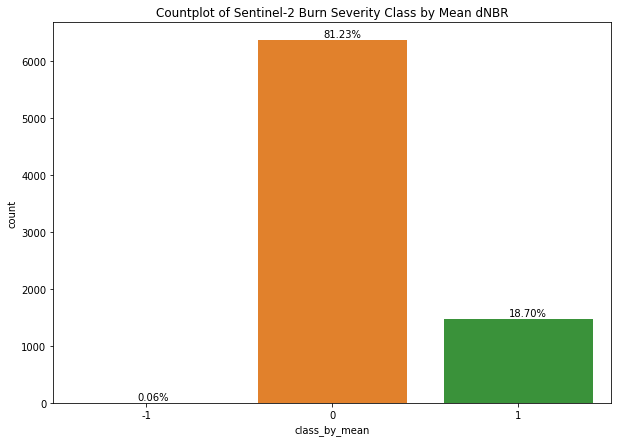

In [38]:
plt.figure(figsize=(10,7))
plt.title("Countplot of Sentinel-2 Burn Severity Class by Mean dNBR")
ax = sns.countplot(x='class_by_mean', data=sentinel_df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(sentinel_df)*100), (p.get_x()+0.35, p.get_height()+50))
plt.show()

## 4.2.6 Countplot of Sentinel-2 Burn Severity Class by Median dNBR


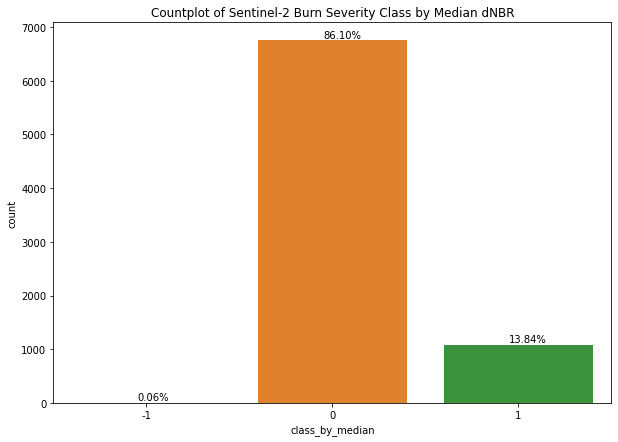

In [39]:
plt.figure(figsize=(10,7))
plt.title("Countplot of Sentinel-2 Burn Severity Class by Median dNBR")
ax = sns.countplot(x='class_by_median', data=sentinel_df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(sentinel_df)*100), (p.get_x()+0.35, p.get_height()+50))
plt.show()

## 4.2.7 Save Sentinel Dataframe as CSV

In [40]:
sentinel_df.to_csv(METADATA_SENTINEL_2_FILE_PATH ,index=False)
sentinel_df = pd.read_csv(METADATA_SENTINEL_2_FILE_PATH)
display(sentinel_df.head())

,folder_paths_geotiff,mean_dnbr,median_dnbr,class_by_mean,class_by_median
0,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124348,0.098779,0,0
1,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124229,0.098487,0,0
2,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.123137,0.096676,0,0
3,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.141992,0.104607,0,0
4,\wildfire-sumatera-dataset\wildfire-sumatera-g...,0.124485,0.098878,0,0
